Write a Python program to draw (visualize) the architecture of a Neural Network used to classify fraudulent and non-fraudulent credit card transactions.



Assume the fraud detection dataset contains the following input features:



Transaction Amount

Transaction Time

Merchant Category

Customer Age

Account Balance

Number Of Transactions Today

Fraud (0 = Genuine, 1 = Fraud)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import numpy as np

In [ ]:
def draw_neural_network(ax, layer_sizes, layer_labels, feature_names=None):
    """
    Draw a neural network architecture diagram

    Parameters:
    - ax: matplotlib axis
    - layer_sizes: list of integers representing neurons in each layer
    - layer_labels: list of strings for layer names
    - feature_names: list of strings for input feature names
    """

    n_layers = len(layer_sizes)
    v_spacing = 1.0 / max(layer_sizes)
    h_spacing = 1.0 / (n_layers - 1)

    # Store neuron positions
    neuron_positions = []

    # Draw neurons for each layer
    for i, (layer_size, label) in enumerate(zip(layer_sizes, layer_labels)):
        layer_neurons = []
        x = i * h_spacing

        # Calculate vertical positions to center the layer
        layer_top = (1 - (layer_size * v_spacing)) / 2

        for j in range(layer_size):
            y = layer_top + j * v_spacing

            # Draw neuron circle
            if i == 0:  # Input layer - blue
                circle = plt.Circle((x, y), radius=0.02, color='#3498db', ec='black', linewidth=1.5, zorder=4)
            elif i == n_layers - 1:  # Output layer - red
                circle = plt.Circle((x, y), radius=0.025, color='#e74c3c', ec='black', linewidth=1.5, zorder=4)
            else:  # Hidden layers - green
                circle = plt.Circle((x, y), radius=0.02, color='#2ecc71', ec='black', linewidth=1.5, zorder=4)

            ax.add_patch(circle)
            layer_neurons.append((x, y))

            # Add feature names for input layer
            if i == 0 and feature_names and j < len(feature_names):
                ax.text(x - 0.15, y, feature_names[j],
                       fontsize=9, ha='right', va='center', fontweight='bold')

            # Add output label
            if i == n_layers - 1:
                ax.text(x + 0.15, y, 'Fraud Probability',
                       fontsize=10, ha='left', va='center', fontweight='bold', color='#e74c3c')

        neuron_positions.append(layer_neurons)

        # Add layer label
        ax.text(x, -0.1, label, fontsize=11, ha='center', fontweight='bold')
        ax.text(x, -0.15, f'({layer_size} neurons)', fontsize=9, ha='center', style='italic')

    # Draw connections between layers
    for i in range(n_layers - 1):
        for start_pos in neuron_positions[i]:
            for end_pos in neuron_positions[i + 1]:
                # Draw lines with transparency
                line = plt.Line2D([start_pos[0], end_pos[0]],
                                 [start_pos[1], end_pos[1]],
                                 c='gray', alpha=0.3, linewidth=0.5, zorder=1)
                ax.add_line(line)

    ax.axis('off')
    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(-0.25, 1.05)

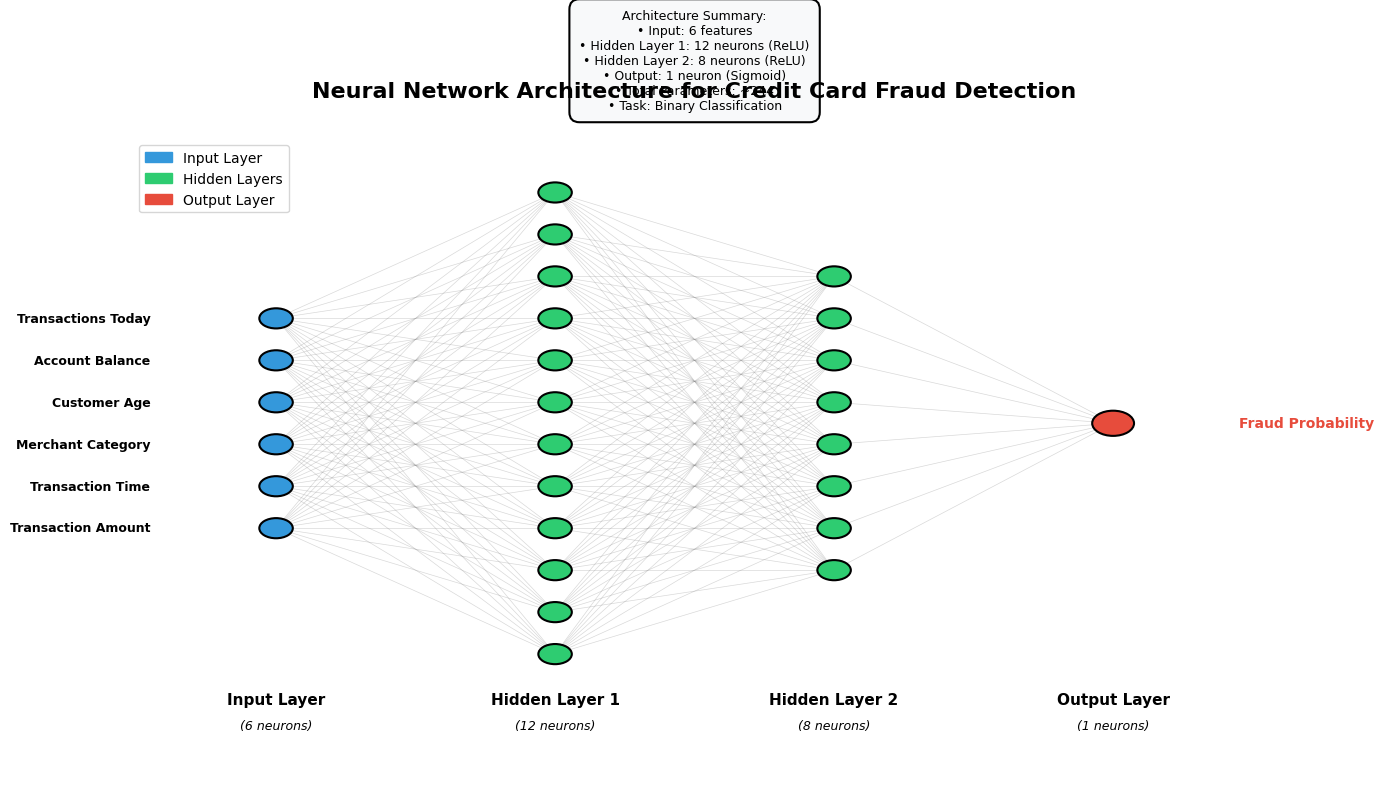

In [ ]:
# Define the architecture
layer_sizes = [6, 12, 8, 1]
layer_labels = ['Input Layer', 'Hidden Layer 1', 'Hidden Layer 2', 'Output Layer']

# Input feature names
feature_names = [
    'Transaction Amount',
    'Transaction Time',
    'Merchant Category',
    'Customer Age',
    'Account Balance',
    'Transactions Today'
]

# Create the visualization
fig, ax = plt.subplots(figsize=(14, 8))
fig.patch.set_facecolor('white')

# Draw the network
draw_neural_network(ax, layer_sizes, layer_labels, feature_names)

# Add title
plt.title('Neural Network Architecture for Credit Card Fraud Detection',
         fontsize=16, fontweight='bold', pad=20)

# Add architecture summary box
summary_text = (
    'Architecture Summary:\n'
    '• Input: 6 features\n'
    '• Hidden Layer 1: 12 neurons (ReLU)\n'
    '• Hidden Layer 2: 8 neurons (ReLU)\n'
    '• Output: 1 neuron (Sigmoid)\n'
    '• Total Parameters: ~244\n'
    '• Task: Binary Classification'
)

props = dict(boxstyle='round,pad=0.8', facecolor='#f8f9fa', edgecolor='black', linewidth=1.5)
ax.text(0.5, 1.02, summary_text, transform=ax.transAxes, fontsize=9,
        verticalalignment='bottom', horizontalalignment='center', bbox=props)

# Add legend
input_patch = mpatches.Patch(color='#3498db', label='Input Layer')
hidden_patch = mpatches.Patch(color='#2ecc71', label='Hidden Layers')
output_patch = mpatches.Patch(color='#e74c3c', label='Output Layer')
ax.legend(handles=[input_patch, hidden_patch, output_patch],
         loc='upper left', bbox_to_anchor=(0.02, 0.98), fontsize=10)

plt.tight_layout()
plt.show()



In [ ]:
# Print network details
print("="*60)
print("CREDIT CARD FRAUD DETECTION NEURAL NETWORK")
print("="*60)
print("\nInput Features (6):")
for idx, feature in enumerate(feature_names, 1):
    print(f"  {idx}. {feature}")

print("\nNetwork Architecture:")
print(f"  Input Layer:      {layer_sizes[0]} neurons")
print(f"  Hidden Layer 1:   {layer_sizes[1]} neurons (Activation: ReLU)")
print(f"  Hidden Layer 2:   {layer_sizes[2]} neurons (Activation: ReLU)")
print(f"  Output Layer:     {layer_sizes[3]} neuron  (Activation: Sigmoid)")

print("\nOutput:")
print("  Fraud Probability: 0.0 to 1.0")
print("    • 0.0 - 0.5: Genuine Transaction")
print("    • 0.5 - 1.0: Fraudulent Transaction")

print("\nTotal Trainable Parameters:")
params_1 = layer_sizes[0] * layer_sizes[1] + layer_sizes[1]  # Input to Hidden1
params_2 = layer_sizes[1] * layer_sizes[2] + layer_sizes[2]  # Hidden1 to Hidden2
params_3 = layer_sizes[2] * layer_sizes[3] + layer_sizes[3]  # Hidden2 to Output
total_params = params_1 + params_2 + params_3
print(f"  Input → Hidden1:  {params_1} parameters")
print(f"  Hidden1 → Hidden2: {params_2} parameters")
print(f"  Hidden2 → Output:  {params_3} parameters")
print(f"  Total:            {total_params} parameters")
print("="*60)

CREDIT CARD FRAUD DETECTION NEURAL NETWORK

Input Features (6):
  1. Transaction Amount
  2. Transaction Time
  3. Merchant Category
  4. Customer Age
  5. Account Balance
  6. Transactions Today

Network Architecture:
  Input Layer:      6 neurons
  Hidden Layer 1:   12 neurons (Activation: ReLU)
  Hidden Layer 2:   8 neurons (Activation: ReLU)
  Output Layer:     1 neuron  (Activation: Sigmoid)

Output:
  Fraud Probability: 0.0 to 1.0
    • 0.0 - 0.5: Genuine Transaction
    • 0.5 - 1.0: Fraudulent Transaction

Total Trainable Parameters:
  Input → Hidden1:  84 parameters
  Hidden1 → Hidden2: 104 parameters
  Hidden2 → Output:  9 parameters
  Total:            197 parameters
